# Formating environemental data

To calculate the mean sequestration time of the POC derived fromm krill, we need to calculate the attenuation of the POC flux, which depends on several environemental drivers, notably temperature and oxygen and Mixed Layer Depth (MLD).

This script aims to check and formate these data so they can be used easly in the POC attenuation and sequestration time calculation.

In this script we formate the physical data : Temperature and MLD data.
Also see the "oxygen_formating" file for oxygen concentration formating.

## Temperature and MLD data
We use the "Monthly climatology fields for product GLOBAL_REANALYSIS_PHY_001_030" dataset from Copernicus marine data (https://data.marine.copernicus.eu)
The data are described as "the GLORYS12V1 product is the CMEMS global ocean eddy-resolving (1/12° horizontal resolution, 50 vertical levels) reanalysis covering the altimetry (1993 onward)." 
https://doi.org/10.48670/moi-00021

We extracted the temperature (potential seawater temperature) and MLD (mixed layer depth) data from this data set.

The monthly climatologies (mean by month over the years 1993 to 2016) were selected, on a spatial domain from -40°S to -80°S. 

As the krill sequestration processes mainly occur in summer and spring, as well as the main part of fishing activities, the 6 summer months were average to obtain a summer climatological mean of the temperature, and MLD.

In [1]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import os
import scipy
import math

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
os.chdir('./Key_Areas_krill_carbon_sequestration/data_envir/Ocean_phy_climatologies_month')

In [4]:
# load data from october to march
data_phy_10 = xr.open_dataset('mercatorglorys12v1_gl12_mean_1993_2016_10.nc')
data_phy_11 = xr.open_dataset('mercatorglorys12v1_gl12_mean_1993_2016_11.nc')
data_phy_12 = xr.open_dataset('mercatorglorys12v1_gl12_mean_1993_2016_12.nc')
data_phy_01 = xr.open_dataset('mercatorglorys12v1_gl12_mean_1993_2016_01.nc')
data_phy_02 = xr.open_dataset('mercatorglorys12v1_gl12_mean_1993_2016_02.nc')
data_phy_03 = xr.open_dataset('mercatorglorys12v1_gl12_mean_1993_2016_03.nc')
listmonth = [data_phy_10, data_phy_11, data_phy_12, data_phy_01, data_phy_02, data_phy_03]

#### Make the summer mean for temperature (thetao) and MLD

In [5]:
# Extract thetao data for the 6 summer months
[thetao_10, thetao_11, thetao_12, thetao_01, thetao_02, thetao_03] = [i['thetao'] for i in listmonth]
thetao_03 # check

<xarray.DataArray 'thetao' (time: 1, depth: 50, latitude: 2041, longitude: 4320)>
[440856000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1993-03-16T12:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    cell_methods:   area: mean

In [6]:
# Extract MLD (mlotst) data for the 6 summer months
[MLD_10, MLD_11, MLD_12, MLD_01, MLD_02, MLD_03] = [i['mlotst'] for i in listmonth]
MLD_03 # check

<xarray.DataArray 'mlotst' (time: 1, latitude: 2041, longitude: 4320)>
[8817120 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1993-03-16T12:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
Attributes:
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_theta
    long_name:      Density ocean mixed layer thickness
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean

In [7]:
# combine together the 6 months, and take the mean
# /!\ THESE 2 LINES TAKE SOME TIME TO RUN !
combined_month = xr.concat([thetao_10, thetao_11, thetao_12, thetao_01, thetao_02, thetao_03], dim="time")
thetao_summer = combined_month.mean(dim="time")
thetao_summer

<xarray.DataArray 'thetao' (depth: 50, latitude: 2041, longitude: 4320)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7369   , -1.7369   , -1.7369   , ..., -1.737022 ,
         -1.737022 , -1.737022 ],
        [-1.7392193, -1.7392193, -1.7392193, ..., -1.7392193,
         -1.7392193, -1.7392193],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03

In [8]:
# Same for MLD
combined_MLD_month = xr.concat([MLD_10, MLD_11, MLD_12, MLD_01, MLD_02, MLD_03], dim="time")
MLD_summer = combined_MLD_month.mean(dim="time")
MLD_summer

<xarray.DataArray 'mlotst' (latitude: 2041, longitude: 4320)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [23.422958, 23.422958, 23.422958, ..., 23.422958, 23.422958,
        23.422958],
       [22.48197 , 22.48197 , 22.48197 , ..., 22.5074  , 22.5074  ,
        22.5074  ],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0

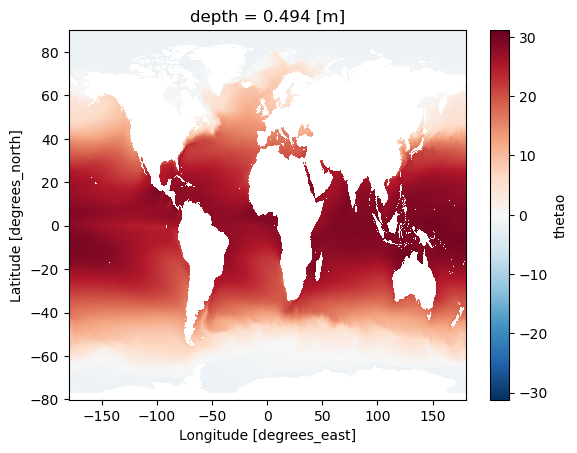

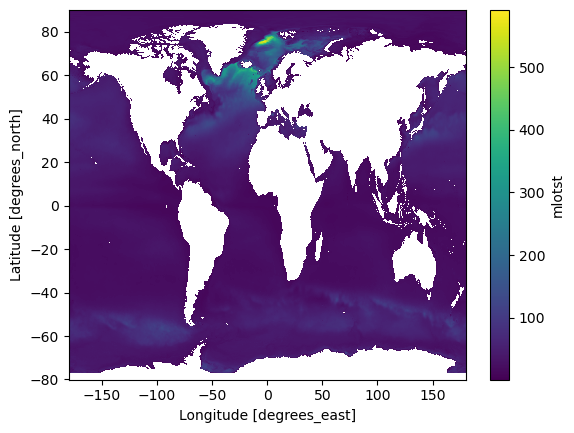

In [9]:
# Some checks
thetao_summer.isel(depth=0).plot() # check first layer depth
plt.show()
MLD_summer.plot() # check 

### Formate 2D spatial grid

The OCIM outputs and the dataset of environmental data are not on the same resolution and their grids are not the same : 
- The physical data has a 1/12° resolution, it has 2041 latitudinal bands and 4320 longitudinal bands.

Thus we interpolate temperature and MLD data over a 2°x2° (2D) spatial grid.

In [10]:
# interpolate the physcial data
new_lat = np.arange(-79, 90, 2) # create desired latitude and longitude vectors (start at -79 to match the OCIM coords wich are 2°x2° on odd numbers)
new_lon = np.arange(-179, 180, 2) # same for longitude
thetao_summer_interpolated = thetao_summer.interp(latitude=new_lat, longitude=new_lon)
MLD_summer_interpolated = MLD_summer.interp(latitude=new_lat, longitude=new_lon)
thetao_summer_interpolated #check OK

<xarray.DataArray 'thetao' (depth: 50, latitude: 85, longitude: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-1.1902523 , -1.36030138, -1.40717757, ..., -0.95013303,
         -1.0193491 , -1.12384415],
        ...,
        [-1.69295311, -1.69405138, -1.69490588, ..., -1.68855822,
         -1.68977928, -1.6913662 ],
        [-1.70113218, -1.70125425, -1.70149839, ..., -1.70223081,
         -1.70198667, -1.70137632],
        [-1.71504843, -1.71419394, -1.71333945, ..., -1.71797812,
         -1.71687949, -1.71602499]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-1.18683434, -1.35590684, -1.4025389 , ..., -0.94842404,
         -1.0178839 , -1.12201309],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) int32 -79 -77 -75 -73 -71 -69 ... 79 81 83 85 87 89
  * longitude  (longitude) int32 -179 -177 -175 -173 -171 ... 173 175 177 179

### Formate depth grid

Regarding depth, the resolution are also different: physical data have 50 depth layers but OCIM has 48 depth layers (and they are not defined on the same intervals). We have to interpolate the T and O2 values at the boudaries of the depth layers of OCIM. 
Indeed, the flux of POC will be calculated at these depth.

In the "fseq_OCIM2_48L" file, we have the middle depth of each layers of the model, but in the "base_data_OCIM2_48L" file we have the upper bound of each layers. Thus we interpolated on the layers boundaries for temperature and oxygen data. 

In [11]:
# load base_data_OCIM2_48L and fseq_OCIM2_48L file to get the depth mid point and boundaries
os.chdir('./Key_Areas_krill_carbon_sequestration/data_envir')
base_data_OCIM2_48L = xr.open_dataset('OCIM2_48L_base_data.nc')
fseq_OCIM2_48L = xr.open_dataset('fseq_OCIM2_48L.nc')

fseq_OCIM2_48L = fseq_OCIM2_48L.assign_coords(longitude = fseq_OCIM2_48L.LON.sel(latitude=0, depth=0),
                                              latitude = fseq_OCIM2_48L.LAT.sel(longitude=0, depth=0), 
                                             depth = fseq_OCIM2_48L.DEPTH.isel(longitude=0, latitude=0))


# Calculate the OCIM boundaries of depth layers:
upper_boudaries = np.unique(np.asarray(base_data_OCIM2_48L['wz']))
upper_boudaries[0] = 0.4940250
# we replace the surface value by 0.4940250 instead of 0 because we don't have the temperature value at depth = 0 (first value at 0.4940250m)

# add the last boudary (sea floor)
last_bottom_boudary = fseq_OCIM2_48L.depth[-1] - (upper_boudaries[-1] - fseq_OCIM2_48L.depth[-1])
layers_depth = np.insert(upper_boudaries, 48, last_bottom_boudary) # insert at last position 
layers_depth

array([4.94025000e-01, 9.86908175e+00, 1.98858758e+01, 3.03458068e+01,
       4.15442995e+01, 5.37767783e+01, 6.73386681e+01, 8.25253934e+01,
       9.96323788e+01, 1.18955049e+02, 1.40788829e+02, 1.65429142e+02,
       1.93171415e+02, 2.24311071e+02, 2.59143535e+02, 2.97964231e+02,
       3.41068585e+02, 3.88752021e+02, 4.41309963e+02, 4.99037836e+02,
       5.62231066e+02, 6.31185076e+02, 7.06195290e+02, 7.87557135e+02,
       8.75566034e+02, 9.70517412e+02, 1.07270669e+03, 1.18242930e+03,
       1.29998067e+03, 1.42565621e+03, 1.55975135e+03, 1.70256152e+03,
       1.85438214e+03, 2.01550864e+03, 2.18623644e+03, 2.36686096e+03,
       2.55767764e+03, 2.75898189e+03, 2.97106913e+03, 3.19423481e+03,
       3.42877433e+03, 3.67498312e+03, 3.93315661e+03, 4.20359023e+03,
       4.48657939e+03, 4.78241952e+03, 5.09140605e+03, 5.41383440e+03,
       5.75000000e+03])

In [12]:
# For the depth interpolation (only for temperature)
new_depth = layers_depth
thetao_summer_interpolated = thetao_summer_interpolated.interp(depth = new_depth)

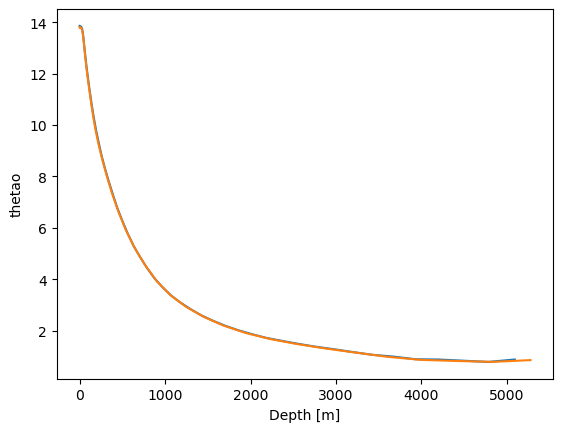

In [13]:
#check with mean temperatue with respect to depth
thetao_summer_interpolated.mean(dim=['latitude', 'longitude']).plot()
thetao_summer.mean(dim=['latitude', 'longitude']).plot()
# they both look the same = check OK

### Crop the data to keep the Southern Ocean only

All the data southward than -40°S are selected.

In [14]:
# Crop for the Southern Ocean (original resolution)
thetao_summer_SO = thetao_summer.sel(latitude=slice(-80, -40))
MLD_summer_SO = MLD_summer.sel(latitude=slice(-80, -40))

# Crop for the Southern Ocean (2°X2° resolution)
thetao_summer_SO_interpolated = thetao_summer_interpolated.sel(latitude=slice(-80, -40))
MLD_summer_SO_interpolated = MLD_summer_interpolated.sel(latitude=slice(-80, -40))

Text(0.5, 1.0, 'Map of the mean temperature across depth')

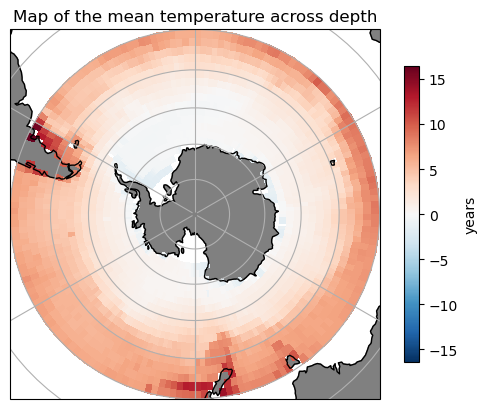

In [15]:
# some plots to check
# This is the map projection we want to plot *onto*
map_proj = ccrs.SouthPolarStereo()

p = thetao_summer_SO_interpolated.mean(dim = 'depth').plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = 'years', shrink = 0.8)
plt.title('Map of the mean temperature across depth')

Text(0.5, 1.0, 'Map of the mean temperature across depth')

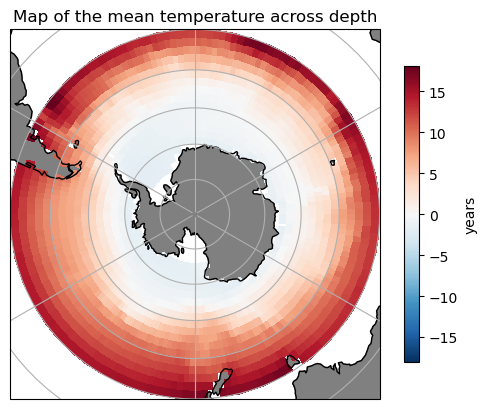

In [16]:
# some plots to check
# This is the map projection we want to plot *onto*
map_proj = ccrs.SouthPolarStereo()

p = thetao_summer_SO_interpolated.isel(depth=0).plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}
) 


p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = 'years', shrink = 0.8)
plt.title('Map of the mean temperature across depth')

Text(0.5, 1.0, 'Map of the mixed layer depth')

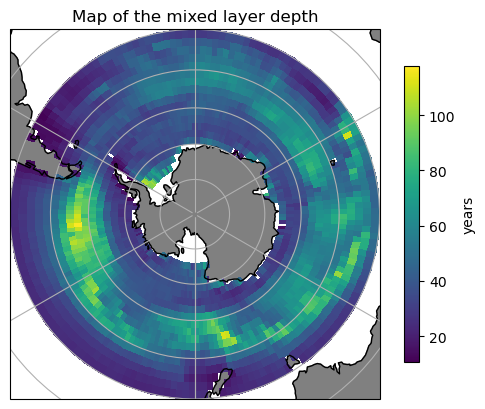

In [17]:
# some plots to check
# This is the map projection we want to plot *onto*
map_proj = ccrs.SouthPolarStereo()

p = MLD_summer_SO_interpolated.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = 'years', shrink = 0.8)
plt.title('Map of the mixed layer depth')

### Summary of the formated files available in this script

For both Temperature and MLD
- summer average with original resolution (1/12° x 1/12°, 50 depth bands), global scale = thetao_summer & MLD_summer


- with 2° x 2° resolution and the 48 ocim depth bands, global scale = **thetao_summer_interpolated & MLD_summer_interpolated**


- summer average with original resolution (1/12° x 1/12°, 50 depth bands), Southern ocean (from -40°) = thetao_summer_SO & MLD_summer_SO


- with 2° x 2° resolution and the 48 ocim depth bands, Southern ocean (from -40°) = **thetao_summer_SO_interpolated & MLD_summer_SO_interpolated**

(8 versions total)

In [85]:
# Save files
## for now save only thetao and MLD interpolated SO (the file we use in the POC attenuation calculation)
thetao_summer_SO_interpolated.to_netcdf('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/thetao_summer_SO_interpolated.nc')
MLD_summer_SO_interpolated.to_netcdf('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/MLD_summer_SO_interpolated.nc')